# Distribution Fitting with Sum of Square Error (SSE)
## find best fit by computing the least/minimum residual sum of squares 

In [1]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
#import statsmodels as sm
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [
        st.norm,
        st.powerlaw,
        st.powerlognorm,
        st.powernorm,
        st.weibull_min,
        st.weibull_max,
        st.dweibull,
        st.erlang,
        st.expon,
        st.exponnorm,
        st.exponweib,
        st.logistic,
        st.loggamma,
        st.loglaplace,
        #st.johnsonsb,
        #st.johnsonsu,
        st.skewnorm,
        st.pareto,
        st.pearson3,
        st.beta,
        st.lognorm,
        st.gengamma
        
        
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
                    print("distribution: " +str(distribution))
                    print("best_params: " +str(best_params))
                    print("best_sse: " +str(best_sse))

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf



In [2]:
import os

# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
data

#location = os.getcwd()+'/Covid-19_Data/Raw Data/'
#owid_location = 'owid-covid-data.csv'

#data = pd.read_csv(location+owid_location)
#data = pd.read_csv(owid_location)
#data = data[(data.location != 'International') & (data.location != 'World')]
#data

0      23.11
1      24.20
2      25.37
3      23.86
4      23.03
       ...  
727    19.49
728    19.28
729    19.73
730    20.44
731    22.07
Length: 732, dtype: float64

In [3]:
series = pd.read_csv('electrical_1.csv', header=0, index_col=0, squeeze=True)
series = series.drop('Reading ID', axis=1)
series = series.drop('Status', axis=1)
print(series.head())

         Humidity    Temperature     MQ139    TVOC   eCO2   Detector
Time                                                                
0:00:00       38.2            21.9      69       0     400       OFF
0:00:02       38.2            21.9      69       0     400       OFF
0:00:04       38.2            21.9      69       0     400       OFF
0:00:06       38.2            21.9      68       0     400       OFF
0:00:08       38.3            21.9      68       0     400       OFF


In [4]:
series = series.reset_index()

In [5]:
# TVOC
#series.iloc[:,4]

new_cases_per_million = data['new_cases_per_million']
new_cases_per_million = new_cases_per_million.dropna()
new_cases_per_million
new_cases_per_million = new_cases_per_million[ new_cases_per_million >= 0 ]

In [6]:
# TVOC
data = series.iloc[:,4]
data

0          0
1          0
2          0
3          0
4          0
        ... 
1135    7020
1136    7115
1137    7261
1138    7110
1139    7144
Name:   TVOC, Length: 1140, dtype: int64

In [7]:
data.describe()

count    1140.000000
mean      447.824561
std      1094.403007
min         0.000000
25%        96.000000
50%       137.000000
75%       182.000000
max      7261.000000
Name:   TVOC, dtype: float64

array([969.,  60.,  40.,  20.,   4.,   3.,   3.,   3.,   4.,   2.,  10.,
         6.,   0.,   3.,  13.])

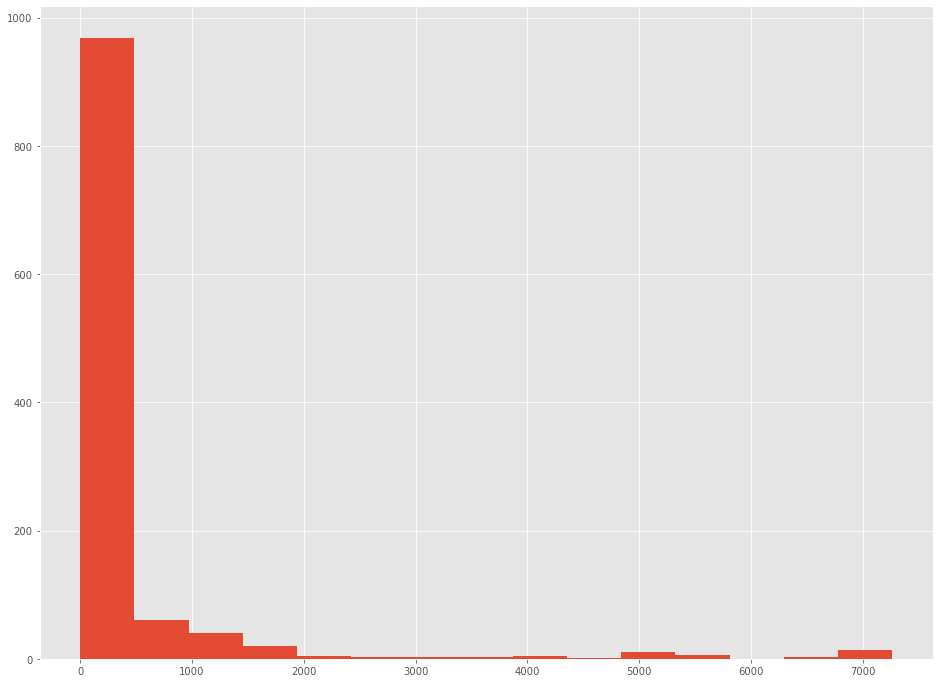

In [8]:
hist, bins, _ = plt.hist(data, bins = 15)
hist

<ipython-input-9-f70ba7f6d185>:6: RuntimeWarning: divide by zero encountered in log10
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
D:\Users\Z10903\Anaconda3\lib\site-packages\numpy\core\function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
D:\Users\Z10903\Anaconda3\lib\site-packages\numpy\core\function_base.py:154: RuntimeWarning: invalid value encountered in add
  y += start


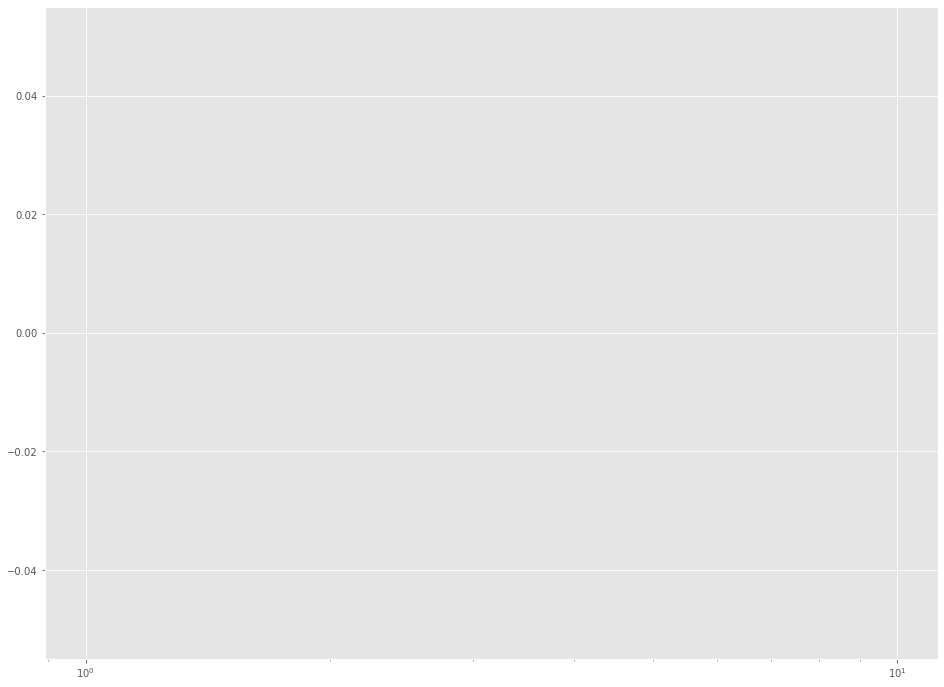

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

plot_loghist(data, 15)

In [10]:
bins

array([   0.        ,  484.06666667,  968.13333333, 1452.2       ,
       1936.26666667, 2420.33333333, 2904.4       , 3388.46666667,
       3872.53333333, 4356.6       , 4840.66666667, 5324.73333333,
       5808.8       , 6292.86666667, 6776.93333333, 7261.        ])

#### histogram on log scale. 
#### Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#logbins = np.geomspace(data.min(), data.max(), 200) 
plt.subplot(212)
plt.hist(data, bins=logbins)
plt.xscale('log')
plt.show()

distribution: <scipy.stats._continuous_distns.norm_gen object at 0x000001FCBE2C2970>
best_params: (447.82456140350877, 1093.9229000832565)
best_sse: 0.0001101532012194702
distribution: <scipy.stats._continuous_distns.powerlaw_gen object at 0x000001FCBE380AF0>
best_params: (0.2717670827123668, -5.360825234245764e-18, 7431.514298026714)
best_sse: 9.673646261407894e-05
distribution: <scipy.stats._continuous_distns.powerlognorm_gen object at 0x000001FCBE380E20>
best_params: (0.0875599777608844, 0.4071409531152761, -21.65745414938464, 48.04082477272044)
best_sse: 5.58306657734108e-05
distribution: <scipy.stats._continuous_distns.dweibull_gen object at 0x000001FCBE2F2100>
best_params: (0.5268122393614327, 135.00000000000006, 166.68691695257735)
best_sse: 2.708889556679978e-05


Text(0, 0.5, 'Frequency')

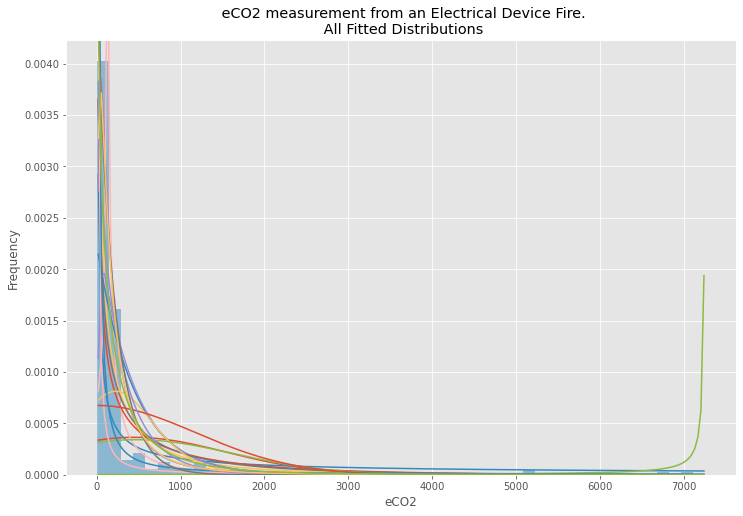

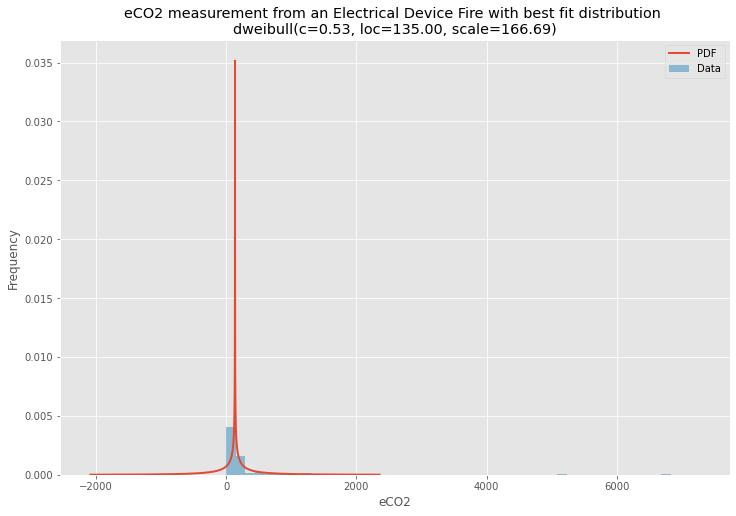

In [11]:

# Plot for comparison
plt.figure(figsize=(12,8))
#ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5) #, color=plt.rcParams['axes.prop_cycle'][1]

ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5,  
               color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u' eCO2 measurement from an Electrical Device Fire.\n All Fitted Distributions')
ax.set_xlabel(u'eCO2')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'eCO2 measurement from an Electrical Device Fire with best fit distribution \n' + dist_str)
ax.set_xlabel(u'eCO2')
ax.set_ylabel('Frequency')